<a href="https://colab.research.google.com/github/LuisMerinos/Modelos-LDA-y-NMF/blob/main/LDA_y_MNF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Instalación de librerias**

In [ ]:
!python -m spacy download es_core_news_sm   
!python -m nltk.downloader stopwords
#!pip install wordcloud
#!pip install pyLDAvis==2.1.2
#!pip install gensim
#!pip install --upgrade gensim

     |████████████████████████████████| 16.2 MB 2.1 MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-py3-none-any.whl size=16172933 sha256=cd799f4b995db79aed0203c86288c82b731562b0ce58485a596ad2410e2b768b
  Stored in directory: /tmp/pip-ephem-wheel-cache-rwjz_yfk/wheels/21/8d/a9/6c1a2809c55dd22cd9644ae503a52ba6206b04aa57ba83a3d8
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# *Limpieza de datos *

In [ ]:
import re
import os
from google.colab import drive 
drive.mount('/content/drive')
# varibles
ruta='/content/drive/MyDrive/Colab Notebooks/discursos/'

discursos = []
dis_limpios = []
#fin de variables
files = os.listdir(ruta) #obtenemos la lista de archivos
list_files = [f for f in files if f[-4:] == '.txt']  # recorre la lista de 
                                                    #archivos y pregunta si sus ultimas lineas son
#------manejo de archivos modo lectura y escritura ------------------------- 
for fil in list_files: #recorre la lista
    with open(ruta+fil, 'r',encoding='utf-8') as f: #abrimos los archivos
        data = f.read()   #lectura de los archivos cargados
        discursos.append(data) #agregamos elementos a la lista 

#------------------------------------
# Hacer el texto en minúsculas, quitar corchetes, líneas vacías, etc.
#expresiones regulares
def limpiar_texto(mi_texto):
    mi_texto = mi_texto.lower() # texto en minúscula 
    mi_texto = re.sub(r"[^a-zA-Z0-9áéíóúñ]"," ",mi_texto) # abreviacion de código
    return mi_texto
#fin de función--------------------------------------------
print(discursos[0])
for dato in discursos:
 dis_limpios.append(limpiar_texto(dato));
for dato in dis_limpios:
  print(dato)
for index, i in enumerate(list_files):
  print(f'Discurso # {index}',i)
def guardar(nombre, datos):
  nuevo_archivo = nombre.split('.')[0]+ '_limpio'
  f= open(ruta+nuevo_archivo,"w+") 
  f.write(datos+" ")
  f.close
for index, n in enumerate(list_files):
   guardar(n,limpiar_texto(discursos[index]))

Mounted at /content/drive
APRECIADOS JEFES DE ESTADO Y DE GOBIERNO,
REPRESENTANTES DE ORGANISMOS INTERNACIONALES Y DE LA SOCIEDAD
CIVIL,
ES MUY VALIOSA LA ARTICULACIÓN ENTRE LAS NACIONES, PARA
PROMOVER LA TRANSFORMACIÓN AGROALIMENTARIA Y HALLAR
SOLUCIONES PARA LA SOSTENIBILIDAD, QUE TANTO ANHELAMOS.
IGUAL QUE EN LA MAYORÍA DE PAÍSES DEL MUNDO, EL TRABAJO DE LOS
AGRICULTORES ES ESENCIAL PARA LA ECONOMÍA DE NUESTRO PAÍS.
PERO TAMBIÉN PARA LA BUENA ALIMENTACIÓN Y NUTRICIÓN DE
MILLONES DE FAMILIAS.
EL SECTOR AGRÍCOLA CONTRIBUYE CON EL 8% AL PRODUCTO INTERNO
BRUTO DEL ECUADOR (ALREDEDOR DE 8 MIL MILLONES DE DÓLARES). PERO
TAMBIÉN SIGNIFICA EL 29% DE LA GENERACIÓN DE EMPLEO ENTRE LA
POBLACIÓN.
LAMENTABLEMENTE, PESE A ESAS IMPORTANTES CIFRAS, NUESTROS
CAMPESINOS AÚN ENFRENTAN GRANDES DESIGUALDADES PARA SUBSISTIR
Y PRODUCIR.
POR ESO, APENAS ESTE GOBIERNO EMPEZÓ SU GESTIÓN, INICIAMOS UN
PROCESO DE FORTALECIMIENTO DEL TRABAJO CAMPESINO Y DE AYUDA A
MILES DE PRODUCTORES ECUATORIANOS.

PRONTO EMPE


# **Lemantización y remoción de stop words, corpus, diccionario**


In [ ]:
import os
import pkg_resources,imp
imp.reload(pkg_resources)
#spacy
import nltk
from nltk.corpus import stopwords

spanish_stopwords = stopwords.words('spanish')
import spacy

# gensim lda
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.test.utils import common_texts
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import LdaModel
from gensim.models.phrases import Phrases



from sklearn.feature_extraction.text import CountVectorizer



import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


from google.colab import drive



# CARGAR ARCHIVOS 
ruta='/content/drive/MyDrive/Colab Notebooks/discursos/'

#lista vacía para cargar los textos
corpus = []
files = os.listdir(ruta) #obtenemos la lista de archivos
list_files = [f for f in files if f[-7:] == '_limpio']  # recorre la lista de 
print(" listas archivos:",list_files)          #archivos y pregunta si sus ultimas lineas son

#buscar en la carpeta 

for fil in list_files: #recorre la lista
 with open(ruta+fil, 'r',encoding='utf-8') as f:
    mi_texto = f.read()
    corpus.append(mi_texto)

#FIN DE CARGAR ARCHIVOS 

print('\n')





#-------------





print('---------------------------lematización------------------------------------')

#forma 1 
 #proceso mediante el cual las palabras de un texto que pertenecen a un mismo 
 #paradigma flexivo o derivativo son llevadas a una forma normal que representa a toda la clase.

def lemma_activa(texts, allowed_postags=["NOUN","ADJ", "VERB", "ADV"]): # validación o permitidos
    nlp = spacy.load("es_core_news_sm") #Vocabulario, sintaxis, entidades, vectores
    texts_out = [] #declara arreglo para el texto de salida
    for text in texts: # se recorre la lista
        doc = nlp(text) #lemmantization
        new_text = [] # se declara arreglo para almacenar los datos 
        for token in doc:
            if token.pos_ in allowed_postags: # si los token encontrados perteneces a los permitidos 
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return texts_out


lemmatized_texts = lemma_activa(corpus) 
for index, i in enumerate(lemmatized_texts):
  print(f'Discurso # {index}',i)








print('\n')
print('-----------------------Tokens----------------------------------------')
#Convierte un documento en una lista de tokens. esto es 
#Esto pone en minúsculas, tokeniza, quita acentos (opcional), inidica el mini y max tamaño de las palabras 
# la salida son tokens finales = cadenas Unicode, que no se procesarán más.
#deacc= elimina acentos

def Tokens(texts,n):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=False,min_len=n)
        final.append(new)
    return final
data_words = Tokens(lemmatized_texts,2)
for index, i in enumerate(data_words):
  print(f'Discurso # {index}',i)





print('\n')
print('---------------------------Bigram------------------------------------')

# Calcular n-gramas de grandes conjuntos de datos puede ser muy computacional
# y memoria intensiva.


Bphrases=[]
vectorizer = CountVectorizer(max_df=0.9,stop_words =stopwords.words('spanish'), ngram_range=(1,2))
X = vectorizer.fit_transform(lemmatized_texts)




for x in vectorizer.get_feature_names_out():
  Bphrases.append(x)


datos_unidos_ngram=[]

for index, i in enumerate(Bphrases):
   mi = re.sub(r"\s+","_",Bphrases[index])
   if len(mi) >9:
      datos_unidos_ngram.append(mi)


   

print(datos_unidos_ngram[0:15])



# Agregue bigramas y trigramas a los documentos (solo los que aparecen 20 veces o más).

bigram = Phrases(datos_unidos_ngram[0:1400]+data_words, min_count=2)

for idx in range(len(data_words)):
    for token in bigram[data_words[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            data_words[idx].append(token)













#for x in vectorizer.get_feature_names_out():
 # print(x)

print('\n')
print('---------------------------StopWords---------------------------------')


def deletewords(text_tokens):
  final =[]
  for text in text_tokens:
    new = [word for word in text if not word in stopwords.words('spanish')]
    final.append(new)
  return(final)
newdato = deletewords(data_words)


for index, i in enumerate(newdato):
  print(f'Discurso # {index}',i)
print('\n')




 # genera archivo csv OPCIONAL--
#data_txt = np.array(data_words)
#data_txtDF = pd.DataFrame(data_txt)
#data_txtDF.to_csv('datas_train.csv',index=False)
#-------------------------------------------------------





print('--------------------------Diccionario---------------------------------------')

#Los diccionarios son objetos que asignan un identificador numérico a 
#cada palabra única y se pueden usar para obtener el identificador a partir de la palabra y viceversa.

def diccionarioT(text):
  dic = Dictionary(text) # original
  dic.filter_extremes(no_below=2, no_above=0.4) #matendra aque
  print(dic)
  return  dic
  
newdato.append(datos_unidos_ngram)
dic = diccionarioT(newdato)

def corpusD(text):
  corpuss = [text.doc2bow(discursos) for discursos in newdato]
  print(len(text)) #número de palabras en el diccionario
  print('\n')
  id_words = [[(text[id], count) for id, count in line] for line in corpuss]
  print(id_words)
  return corpuss


corpuss= corpusD(dic)









#--------------------------------------------------------

#print(id_words[0][0:5])

#print(id2word[1],1)


 listas archivos: ['Cumbre sobre sistemas alimentarios_limpio', 'decreto para mejoras en el sistema educativo_limpio', 'Medidas de seguridad en los centros penitenciarios_limpio', 'Avances en el proceso de vacunación segunda dosis al presidente_limpio', 'Reformatoria a la ley de creacion Uni Amawtay Wasi_limpio']


---------------------------lematización------------------------------------
Discurso # 0 apreciar jefe representante organismo internacional sociedad civil muy valioso articulación nación promover transformación agroalimentario hallar solucionar sostenibilidad tanto igual mayoría país mundo trabajar agricultor esencial economía país también bueno alimentación nutrición millón familia sector agrícola contribuir producto internar bruto alrededor millón dólar también significar generación emplear población lamentablemente pesar importante cifrar campesino aun enfrentar grande desigualdad subsistir producir apenar gobernar empezar gestión iniciar procesar fortalecimiento trabaj

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")




---------------------------StopWords---------------------------------
Discurso # 0 ['apreciar', 'jefe', 'representante', 'organismo', 'internacional', 'sociedad', 'civil', 'valioso', 'articulación', 'nación', 'promover', 'transformación', 'agroalimentario', 'hallar', 'solucionar', 'sostenibilidad', 'igual', 'mayoría', 'país', 'mundo', 'trabajar', 'agricultor', 'esencial', 'economía', 'país', 'bueno', 'alimentación', 'nutrición', 'millón', 'familia', 'sector', 'agrícola', 'contribuir', 'producto', 'internar', 'bruto', 'alrededor', 'millón', 'dólar', 'significar', 'generación', 'emplear', 'población', 'lamentablemente', 'pesar', 'importante', 'cifrar', 'campesino', 'aun', 'enfrentar', 'grande', 'desigualdad', 'subsistir', 'producir', 'apenar', 'gobernar', 'empezar', 'gestión', 'iniciar', 'procesar', 'fortalecimiento', 'trabajar', 'ayudar', 'productor', 'ecuatoriano', 'pronto', 'dar', 'crédito', 'interesar', 'año', 'plazo', 'trabajar', 'tranquilidad', 'formar', 'paralelo', 'ganadería', 

# **Modelo LDA**

In [ ]:
#corpus ( iterable de lista de ( int , float ) , opcional ) – Flujo de vectores de documentos o matriz dispersa de forma 
#( num_documents , num_terms ). Si tiene una matriz en memoria CSC, puede convertirla en un corpus transmitido con la ayuda 
#de gensim.matutils.Sparse2Corpus. Si no se proporciona, el modelo se deja sin entrenar (presumiblemente porque desea llamar update()manualmente).
#num_topics: cantidad de tópicos
#id2word: diccionario
#Alfa y eta: son hiperparámetros qe afectan la densidad de tópicos. El valor por defecto de ambos es 1/num_topics
#Chuncksize: es el número de documentos a ser utilizados en cada pasada de entrenamiento.
#Update_every: Cada cuanto se actualizan los parámetros del modelo.
#passes: la cantidad de pasadas por el corpus durante el entrenamiento.
#random_state: parámetro para controlar la aleatoriedad del proceso de entrenamiento y que nos devuelva siempre los mismos resultados.

lda_model = LdaModel(
    corpus=corpuss,
    id2word=dic,
    chunksize=6,
    alpha='auto',
    eta='auto',
    iterations=1000,
    random_state=1,
    num_topics=5,
    passes=1,
    eval_every=5)


lda_model.show_topics(num_words=7) 


[(0,
  '0.047*"educación" + 0.035*"joven" + 0.027*"niño" + 0.024*"libre" + 0.022*"universidad" + 0.014*"estudiar" + 0.014*"señor_presidente"'),
 (1,
  '0.025*"millón" + 0.021*"vacunación" + 0.020*"manera" + 0.017*"segundar_dosis" + 0.015*"apoyar" + 0.013*"próximo" + 0.013*"nuevamente"'),
 (2,
  '0.027*"derecho" + 0.025*"carcelario" + 0.023*"ley" + 0.019*"centro_carcelario" + 0.019*"paz" + 0.014*"vez" + 0.014*"universidad"'),
 (3,
  '0.026*"educación" + 0.023*"niño" + 0.012*"conocimiento" + 0.011*"llamar" + 0.010*"profesional" + 0.010*"excelencia" + 0.009*"joven"'),
 (4,
  '0.005*"niño" + 0.005*"universidad" + 0.005*"educación" + 0.005*"universidad_libre" + 0.005*"señor_presidente" + 0.005*"joven_ecuatoriano" + 0.005*"educación_superior"')]

In [ ]:





lda = LdaModel(corpus=corpuss, id2word=dic, 
                random_state=5, 
               chunksize=5, passes=1, alpha='auto')


topicos = lda.print_topics(num_words=7, num_topics=20)
for topico in topicos:
    print(topico)


(68, '0.004*"condolencia" + 0.004*"compatriota" + 0.004*"definitivo" + 0.004*"decir" + 0.004*"decidir" + 0.004*"contundente" + 0.004*"derecho"')
(16, '0.004*"condolencia" + 0.004*"compatriota" + 0.004*"definitivo" + 0.004*"decir" + 0.004*"decidir" + 0.004*"contundente" + 0.004*"derecho"')
(51, '0.004*"condolencia" + 0.004*"compatriota" + 0.004*"definitivo" + 0.004*"decir" + 0.004*"decidir" + 0.004*"contundente" + 0.004*"derecho"')
(70, '0.004*"condolencia" + 0.004*"compatriota" + 0.004*"definitivo" + 0.004*"decir" + 0.004*"decidir" + 0.004*"contundente" + 0.004*"derecho"')
(64, '0.004*"condolencia" + 0.004*"compatriota" + 0.004*"definitivo" + 0.004*"decir" + 0.004*"decidir" + 0.004*"contundente" + 0.004*"derecho"')
(21, '0.004*"condolencia" + 0.004*"compatriota" + 0.004*"definitivo" + 0.004*"decir" + 0.004*"decidir" + 0.004*"contundente" + 0.004*"derecho"')
(88, '0.004*"condolencia" + 0.004*"compatriota" + 0.004*"definitivo" + 0.004*"decir" + 0.004*"decidir" + 0.004*"contundente" + 0.0

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


                                            Discurso
0  apreciados jefes de estado y de gobierno  repr...
1  señora maría brown pérez  ministra de educació...
2  muy buenas tardes señora ministra de gobierno ...
3  muy buenos días a todos  un gusto verlos  he c...
4  señora guadalupe llori  presidenta de la asamb...
muy buenos días a todos  un gusto verlos  he cumplido con el procedimiento de la segunda dosis de vacuna  así que ya estoy inmunizado  pero tenemos muy buenas noticias para todos los ecuatorianos  en primer lugar  ayer ya hemos roto nuevamente un récord  casi 170 mil vacunados  hasta la fecha  se ha vacunado en primera y segunda dosis a cerca de cinco millones de ecuatorianos  a partir del 5 de julio comenzamos una segunda etapa  con un plan que tiene previsto vacunar a seis millones de ecuatorianos adicionales  en  primera dosis  hasta finales de julio  y seis millones en segunda dosis  hasta finales de agosto  el sistema es masivo en todo el ecuador  en la costa  en la si

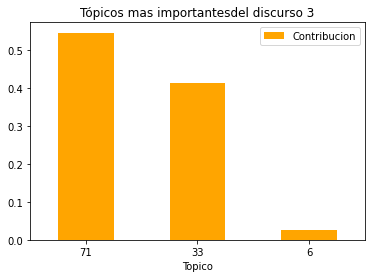

In [ ]:

from seaborn import load_dataset
import pandas as pd
import numpy as np
import random


df = pd.DataFrame()
df['Discurso'] = [corpus[0],corpus[1],corpus[2],corpus[3],corpus[4]]




print(df)

indice_discurso = random.randint(0,len(df))
discurso = df.iloc[indice_discurso]
print(discurso.Discurso)


bow_discurso = corpuss[indice_discurso]
distribucion_discurso = lda[bow_discurso]

# Indices de los topicos mas significativos
dist_indices = [topico[0] for topico in lda[bow_discurso]]
# Contribución de los topicos mas significativos
dist_contrib = [topico[1] for topico in lda[bow_discurso]]

distribucion_topicos = pd.DataFrame({'Topico':dist_indices,
                                     'Contribucion':dist_contrib })
distribucion_topicos.sort_values('Contribucion', 
                                 ascending=False, inplace=True)
ax = distribucion_topicos.plot.bar(y='Contribucion',x='Topico', 
                                   rot=0, color="orange",
                                   title = 'Tópicos mas importantes'
                                   'del discurso ' + str(indice_discurso))


for ind, topico in distribucion_topicos.iterrows():
    print("*** Tópico: " + str(int(topico.Topico)) + " ***")
    palabras = [palabra[0] for palabra in lda.show_topic(
        topicid=int(topico.Topico))]
    palabras = ', '.join(palabras)
    print(palabras, "\n")


*** Tópico: 44 ***
universidad, universidad_libre, señor_presidente, joven_ecuatoriano, educación_superior, reglamentar, preocupación, asambleísta, correspondiente, esperanzar 



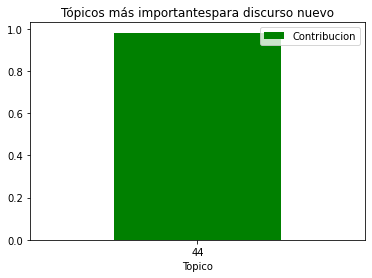

In [ ]:

from nltk.tokenize import ToktokTokenizer
texto = corpus[4]
#limpiar texto 
def limpiar_texto(texto):
    texto = re.sub(r'\W', ' ', str(texto))
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    texto = texto.lower()
    return texto
dato = limpiar_texto(texto)

#~lemma
nlp = spacy.load("es_core_news_sm")
allowed_postags=["NOUN","ADJ", "VERB", "ADV"]
doc = nlp(dato)
new_text = []
final=[]
for token in doc:
            if token.pos_ in allowed_postags: 
                new_text.append(token.lemma_)
                final = " ".join(new_text)



# token 
tokenizer = ToktokTokenizer() 
dato =  tokenizer.tokenize(final)

#stopwords
STOPWORDS = set(stopwords.words("spanish"))
def filtrar_stopword(tokens):
    return [token for token in tokens if token not in STOPWORDS 
            and not token.isdigit()]

dato = filtrar_stopword(dato)
bow_discurso_nuevo = dic.doc2bow(dato)



# Indices de los topicos mas significativos
dist_indices = [topico[0] for topico in lda[bow_discurso_nuevo]]
# Contribucion de los topicos mas significativos
dist_contrib = [topico[1] for topico in lda[bow_discurso_nuevo]]



distribucion_topicos = pd.DataFrame({'Topico':dist_indices,
                                     'Contribucion':dist_contrib })
distribucion_topicos.sort_values('Contribucion', 
                                 ascending=False, inplace=True)
ax = distribucion_topicos.plot.bar(y='Contribucion',x='Topico', 
                                   rot=0, color="green",
                                   title = 'Tópicos más importantes' 
                                   'para discurso nuevo')

for ind, topico in distribucion_topicos.iterrows():
    print("*** Tópico: " + str(int(topico.Topico)) + " ***")
    palabras = [palabra[0] for palabra in lda.show_topic(
        topicid=int(topico.Topico))]
    palabras = ', '.join(palabras)
    print(palabras, "\n")


# **Modelo NMF**







Discurso #0
['escuela', 'hoy', 'país', 'educativo', 'niño', 'encontrar', 'educación']
Discurso #1
['policía', 'incidente', 'respaldar', 'derecho', 'centro', 'carcelario', 'señor']
Discurso #2
['segundar', 'vacunación', 'manera', 'hacer', 'vacunar', 'dosis', 'ecuatoriano']
Discurso #3
['educación', 'ecuatoriano', 'libre', 'presidente', 'universidad', 'joven', 'señor']
Discurso #4
['millón', 'agroalimentario', 'alimentario', 'alimentación', 'gobernar', 'año', 'país']




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


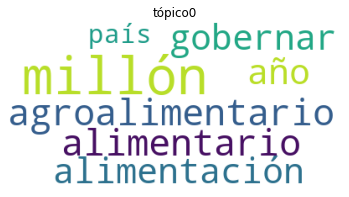

In [ ]:
import pandas as pd 
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer(max_df=0.9,stop_words =stopwords.words('spanish'), ngram_range=(1,2))
X = vectorizer.fit_transform(lemmatized_texts)


#print(vectorizer.get_feature_names_out())
#print(X.toarray())
print('\n')


model = NMF(n_components=5, init='random', random_state=0)
W = model.fit_transform(X)
#print(W)
print('\n')
H = model.components_
#print(H)
print('\n')


nuvedatos=[]
for index,topic in enumerate(H):
    print(f'Discurso #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-7:]])
    nuvedatos.append([vectorizer.get_feature_names()[i] for i in topic.argsort()[-7:]]) 
 
print('\n')
#fin de NMF

#nube de palabras
text = "" 
for word in nuvedatos[4]: 
      text = text + " " + word     
     
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline


for i in range(0,1):
      plt.figure()
      plt.imshow(WordCloud(background_color ='white', prefer_horizontal=1.0 ).generate(text))
      plt.axis("off")
      plt.title("tópico"+str(i))
      plt.show()